In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, voronoi_plot_2d, Voronoi
from delaunay_triangulation_2d import Delaunay2D
import matplotlib.collections

We follow the 2D Delaunay triangulation implementation by [Jose M. Espadero](http://github.com/jmespadero/pyDelaunay2D).

We first show the `scipy` implementation.

In [2]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
tri = Delaunay(points)

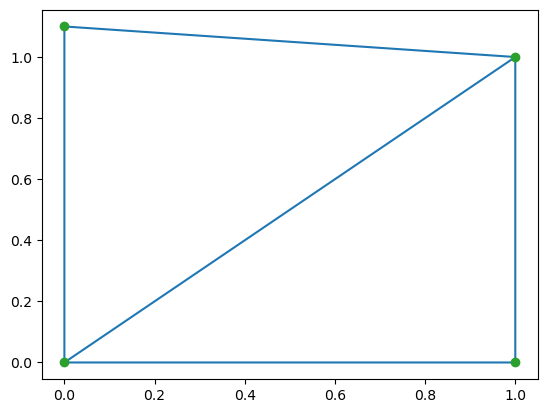

In [3]:
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.show()

Generate random points in a square of size radius

In [4]:
# Generate random points in a square of size radius
num_points = 50
radius = 100
points = radius * np.random.random((num_points, 2))
print("Points:\n", points)
print(
    "BBox Min:", np.amin(points, axis=0), "Bbox Max: ", np.amax(points, axis=0)
)

Points:
 [[89.1519792  93.52989386]
 [25.74289341 41.85389069]
 [82.36508071 18.73407665]
 [83.35042322  2.71747618]
 [98.92745796 60.75454927]
 [35.02000054 10.82436667]
 [47.45172691 64.41810765]
 [38.36020248 26.81633141]
 [60.8176674  69.56299596]
 [32.33144702 78.96906545]
 [16.82158841 69.11424669]
 [77.47533293 83.39896427]
 [33.68017794 87.38957866]
 [76.29860948 53.99890184]
 [46.81665448 91.79233429]
 [26.54154032 11.92274022]
 [25.97974638 78.06077601]
 [38.78465529 67.77805018]
 [15.79127742 52.50276299]
 [32.10360074 79.64951256]
 [29.48979589 29.12243167]
 [37.9279368  41.95730347]
 [39.63030339 34.25517655]
 [14.10840359 83.93798025]
 [35.51917841 93.32455606]
 [45.85088524 52.48375097]
 [ 6.51881708 97.22169008]
 [59.80114747 56.9289251 ]
 [88.26837278 30.1938057 ]
 [66.32864212 99.46098461]
 [54.06293484 61.45461567]
 [ 1.02729072  6.88009305]
 [17.82175293 99.95325295]
 [72.77239994 89.25431512]
 [86.39809853 43.32269836]
 [17.33022872 68.64514733]
 [55.04271505 71.95

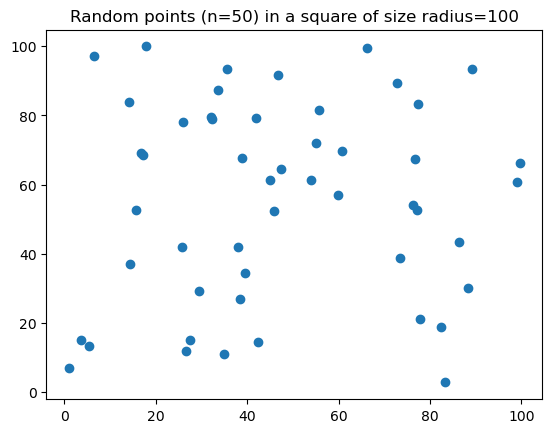

In [5]:
plt.plot(points[:, 0], points[:, 1], "o")
plt.title(f"Random points (n={num_points}) in a square of size radius={radius}")

plt.show()

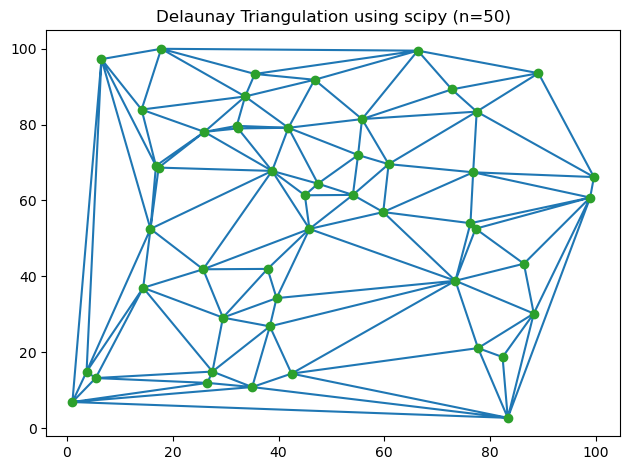

In [6]:
tri = Delaunay(points)

plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.title(f"Delaunay Triangulation using scipy (n={num_points})")
plt.tight_layout()
plt.show()

We now switch to our custom implementation.

In [7]:
center = np.mean(points, axis = 0)
dt = Delaunay2D(center, 50 * radius)

for p in points:
    dt.add_point(p)

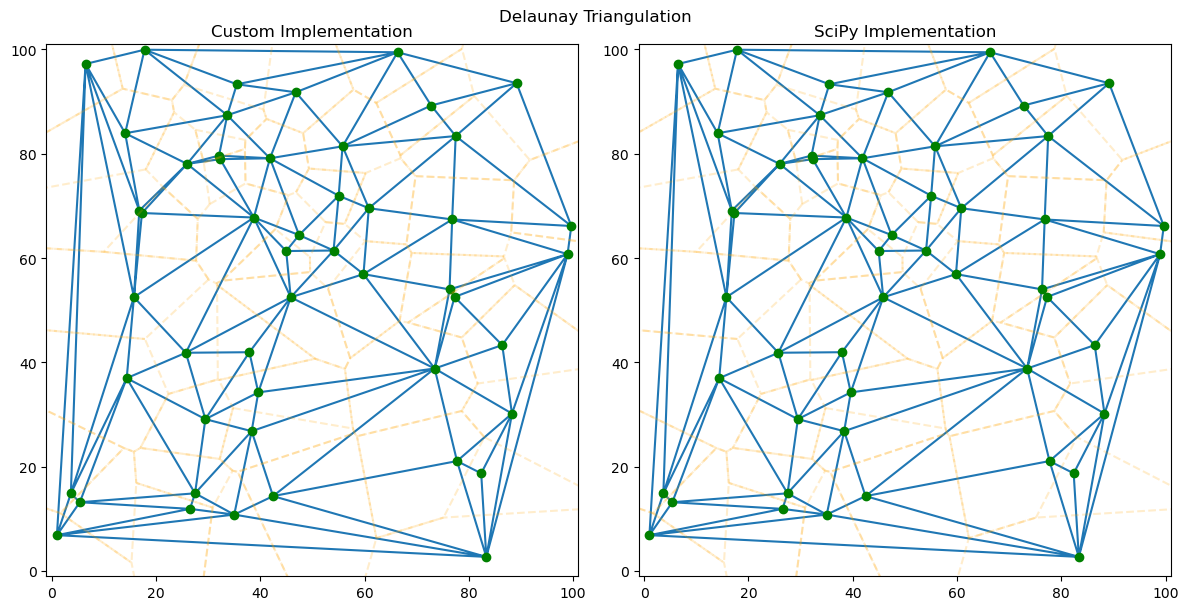

In [8]:
# Set the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figsize as needed

# Plot for Custom Delaunay Triangulation on the left
cx, cy = zip(*points)
dt_tris = dt.export_triangles()
ax[0].triplot(matplotlib.tri.Triangulation(cx, cy, dt_tris), "-")
vc, vr = dt.export_voronoi_regions()

for r in vr:
    polygon = [vc[i] for i in vr[r]]  # build polygon for each region
    ax[0].plot(*zip(*polygon), "--", color="orange", alpha=0.2)
    ax[1].plot(*zip(*polygon), "--", color="orange", alpha=0.2)

ax[0].scatter(cx, cy, color='green')
ax[0].set_title("Custom Implementation")
ax[0].margins(0.1)
ax[0].set_aspect('equal')
ax[0].axis([-1, np.max(points) + 1, -1, np.max(points) + 1])

# Plot for SciPy Delaunay Triangulation on the right
ax[1].triplot(points[:, 0], points[:, 1], tri.simplices)
ax[1].plot(points[:, 0], points[:, 1], 'o', color='green')
ax[1].set_title("SciPy Implementation")
ax[1].margins(0.1)
ax[1].set_aspect('equal')
ax[1].axis([-1, np.max(points) + 1, -1, np.max(points) + 1])

# Setting a title for the whole figure instead of individual plots
fig.suptitle("Delaunay Triangulation")

plt.tight_layout()
plt.show()

---

In [9]:
# points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
# tri = Delaunay(points)

num_points = 5
radius = 50
points = radius * np.random.random((num_points, 2))
tri = Delaunay(points)

In [10]:
# Define colors from the GnBu colormap
gnbu_colormap = plt.colormaps['GnBu']
edge_color = gnbu_colormap(0.7)
point_color = gnbu_colormap(0.5)
voronoi_color = gnbu_colormap(0.4)  # point

<Figure size 1200x1200 with 0 Axes>

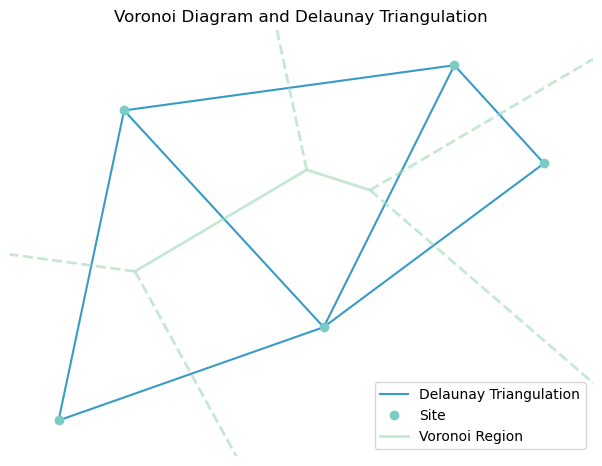

In [11]:
vor = Voronoi(points)
plt.figure(figsize=(4, 4), dpi=300)

fig = voronoi_plot_2d(
    vor,
    show_vertices=False,
    line_colors=voronoi_color,
    line_width=2,
    line_alpha=0.6,
    show_points=False,
)
plt.triplot(
    points[:, 0],
    points[:, 1],
    tri.simplices,
    color=edge_color,
    label="Delaunay Triangulation",
)
plt.plot(points[:, 0], points[:, 1], "o", color=point_color, label="Site")

plt.plot(
    [], [], color=voronoi_color, linewidth=2, alpha=0.6, label="Voronoi Region"
)

plt.tight_layout()
plt.axis("off")
plt.title("Voronoi Diagram and Delaunay Triangulation")
plt.legend()
plt.show()

---

In [12]:
# Define colors from the GnBu colormap
gnbu_colormap = plt.colormaps['GnBu']
edge_color = gnbu_colormap(0.7)
point_color = gnbu_colormap(0.5)
voronoi_color = gnbu_colormap(0.4)  # point
circle_color = gnbu_colormap(0.2)  # point

In [13]:
# Define the radius of the circle and the circle center
radius = 1
center_x = 0
center_y = 0

# Define the angles in radians for each point on the circle at 45 degree intervals starting from 45 degrees
angles = np.radians([45, 45 + 90, 45 + 180, 45 + 270])

# Calculate the x and y coordinates for each point on the circle
points = np.array([[radius * np.cos(angle), radius * np.sin(angle)] for angle in angles])

# Calculate the circle's points for plotting
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = center_x + radius * np.cos(theta)
circle_y = center_y + radius * np.sin(theta)

# Compute the Delaunay triangulation and Voronoi diagram for the points
tri = Delaunay(points)
vor = Voronoi(points)

In [14]:
# Define the angles in radians for three points on the circle at 90 degrees and 120 degrees apart
angles_three_points = np.radians([90, 90 + 120, 90 + 240])

# Calculate the x and y coordinates for the three points on the circle
points_three = np.array(
    [
        [radius * np.cos(angle), radius * np.sin(angle)]
        for angle in angles_three_points
    ]
)

# Compute the Delaunay triangulation and Voronoi diagram for the three points
tri_three = Delaunay(points_three)
vor_three = Voronoi(points_three)

# Define the radius of the circle and the circle center
radius = 1
center_x = 0
center_y = 0

# Calculate the circle's points for plotting
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = center_x + radius * np.cos(theta)
circle_y = center_y + radius * np.sin(theta)

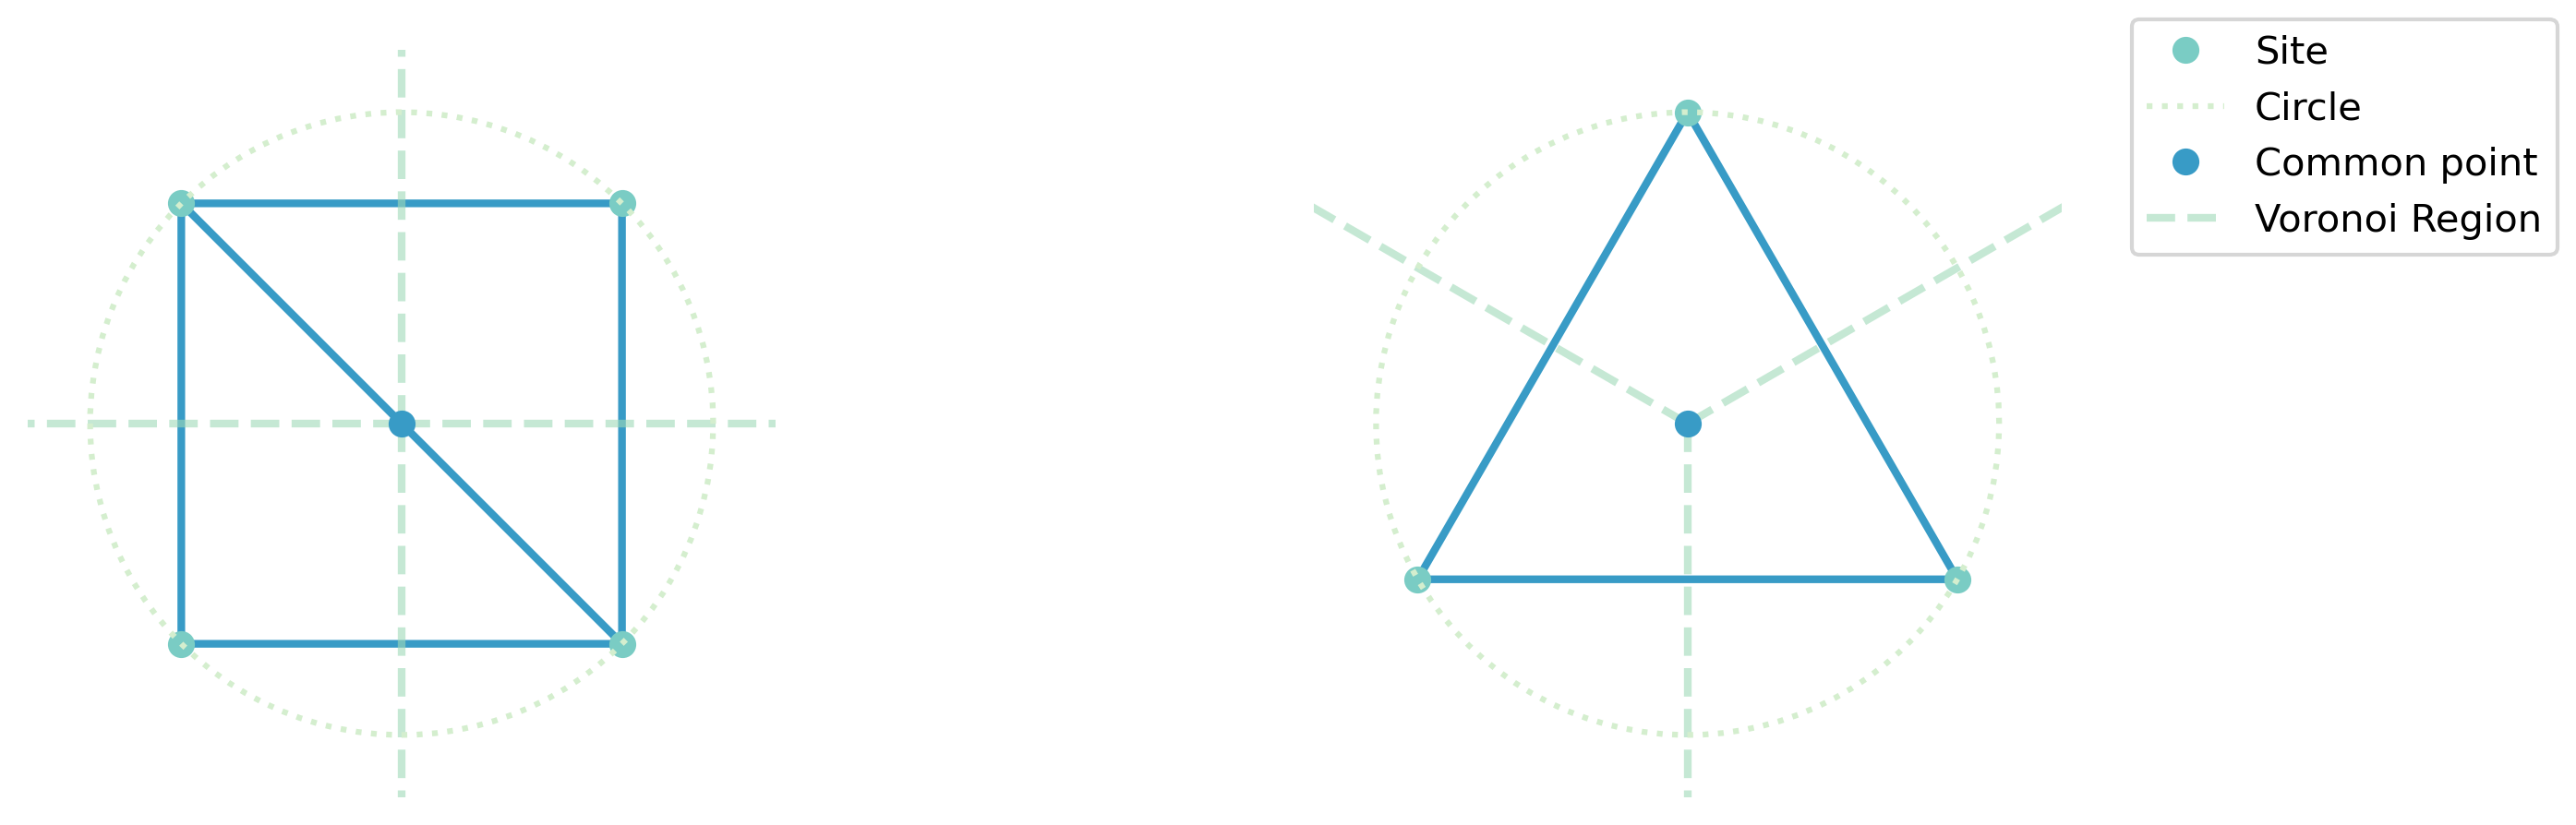

In [15]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 3), dpi=300)

# First subplot for four points
# Plot the Voronoi diagram
voronoi_plot_2d(
    vor,
    show_vertices=False,
    line_colors=voronoi_color,
    line_width=2,
    line_alpha=0.6,
    show_points=False,
    ax=axs[0],
)
# Plot the Delaunay triangulation
axs[0].triplot(
    points[:, 0], points[:, 1], tri.simplices, color=edge_color, lw=2
)
# Plot the points
axs[0].plot(points[:, 0], points[:, 1], "o", color=point_color, label="Site")
# Plot the circle
axs[0].plot(
    circle_x, circle_y, label="Circle", color=circle_color, linestyle="dotted"
)
axs[0].plot([0], [0], "o", color=edge_color, label="Common point")

# Second subplot for three points
# Plot the Voronoi diagram
voronoi_plot_2d(
    vor_three,
    show_vertices=False,
    line_colors=voronoi_color,
    line_width=2,
    line_alpha=0.6,
    show_points=False,
    ax=axs[1],
)
# Plot the Delaunay triangulation
axs[1].triplot(
    points_three[:, 0],
    points_three[:, 1],
    tri_three.simplices,
    color=edge_color,
    lw=2,
)
# Plot the points
axs[1].plot(points_three[:, 0], points_three[:, 1], "o", color=point_color)
# Plot the circle
axs[1].plot(circle_x, circle_y, color=circle_color, linestyle="dotted")
axs[1].plot([0], [0], "o", color=edge_color)
axs[1].plot(
    [],
    [],
    color=voronoi_color,
    linewidth=2,
    alpha=0.6,
    label="Voronoi Region",
    linestyle="--",
)

for ax in axs:
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_aspect("equal")
    ax.axis("off")

fig.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()